In [1]:
print('Hello world!')

Hello world!


In [2]:
# Function for fetching the dataset from GitHub.

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Load dataset into a pandas DataFrame.

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
# Initialize the dataset and print the first 5 rows.

fetch_housing_data()
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

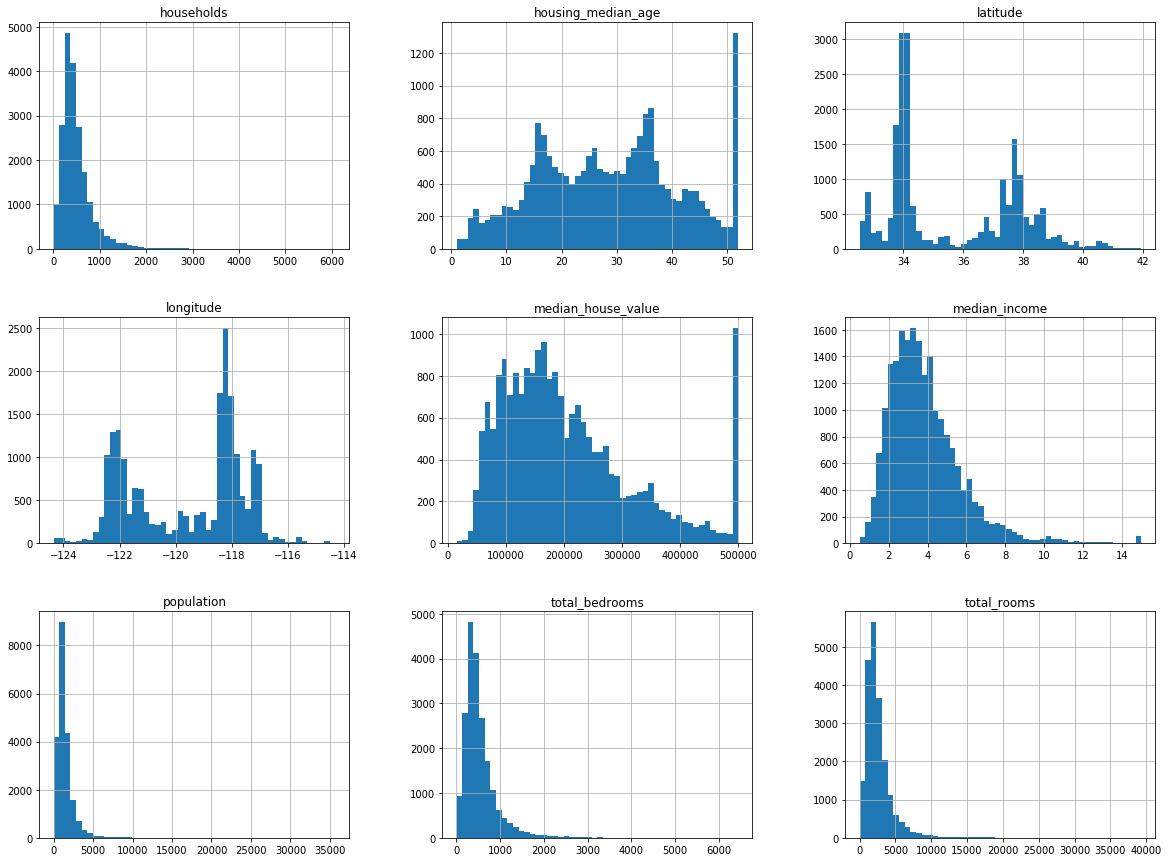

In [8]:
# Plot histograms of each feature of the dataset.

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
# Train-test split function: random selection.

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')

16512 train + 4128 test


In [11]:
# Train-test split function: by hashing.

import hashlib

def test_set_check(identifier, test_ratio, hash_):
    return hash_(np.int64(identifier)).digest()[-1] < (256 * test_ratio)

def split_train_test_by_id(data, test_ratio, id_column, hash_=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash_))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [13]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [14]:
# scikit-learn's built in train_test_split.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
# Create 5 median income categories to deal with the distribution having a longer right tail.

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5., inplace=True)

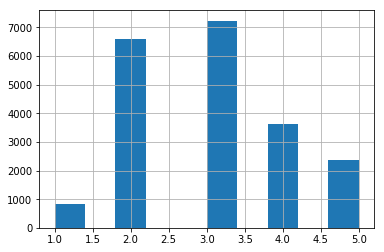

In [16]:
# New distribution by category.

housing['income_cat'].hist()

In [17]:
# Train-test split the data so that each subset has the same ratio of income category as the whole dataset.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [19]:
# Drop income category column to return the data to its original shape.

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [20]:
# For now, we will be working with the training set, copied to the whole dataset's original reference.

housing = strat_train_set.copy()

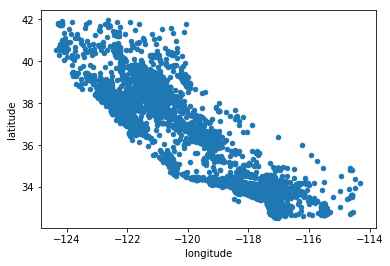

In [21]:
# Scatter plot longitude and latitude

housing.plot(kind='scatter', x='longitude', y='latitude')

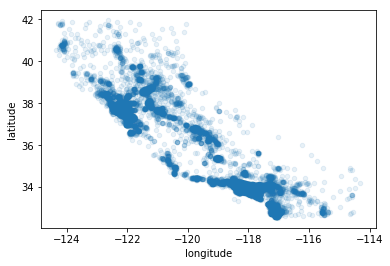

In [22]:
# Get a better picture of density by setting alpha to 0.1

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

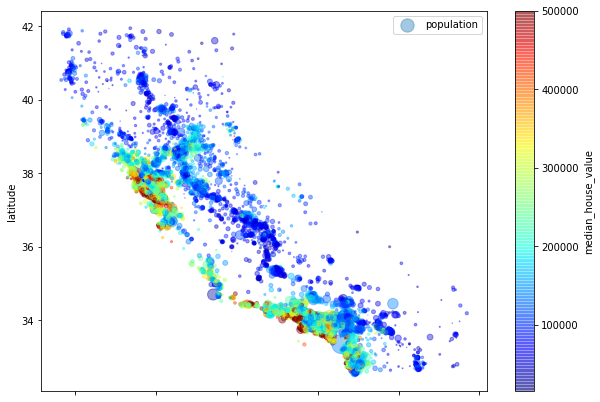

In [23]:
# A more detailed scatter plot. In this case, the radius of each circle is the population,
# and the color represents the median house price.

housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=housing['population']/100,
    label='population',
    figsize=(10, 7),
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
)
plt.legend()

In [24]:
# Calculate the correlation matrix of the dataset, each element being the Pearson's r coefficient between each pair
# of features

corr_matrix = housing.corr()

In [25]:
# The correlation coefficients for median house value sorted in descending order

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10feaa128>,
      dtype=object)

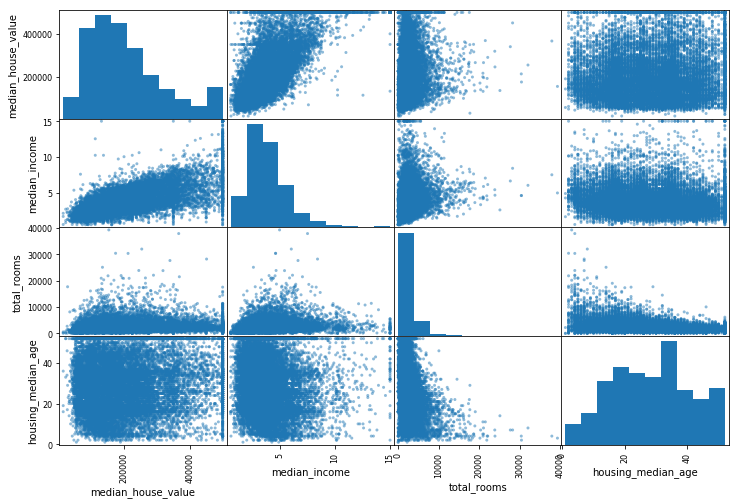

In [26]:
# Since Pearson's r coefficient is unable to detect nonlinear correlations between features, it is useful to plot
# each feature against one another in a scatter plot.

# The grid of scatter plots shows histograms of each feature down the diagonal, otherwise they would just be plots
# of y(x) = x

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income',
    'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

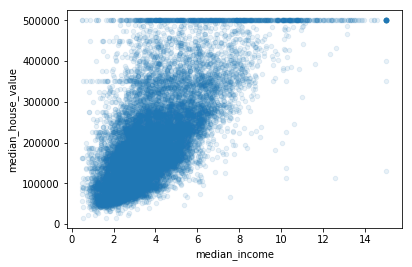

In [27]:
# Plot house value against median income, since the grid above suggests they have the strongest correlation
# We can see there are some quirky horizontal lines which will need to be dealt with later.

housing.plot(
    kind='scatter',
    x='median_income',
    y='median_house_value',
    alpha=0.1,
)

In [28]:
# Create additional features which may prove to be useful.

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [29]:
# Create correlation matrix again.

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [30]:
# Reset training data and separate input features from output labels.

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [31]:
# Below are three methods which can be used for dealing with null valued features in a dataset.

# Option 1: Drop all null values
# housing.dropna(subset=['total_bedrooms'])

# Option 2: Drop feature entirely
# housing.drop('total_bedrooms', axis=1)

# Option 3: Replace all null values with the median
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median, inplace=True)

In [32]:
# Scikit-Learn has an Imputer class designed to help deal with null valued features.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
# Imputer can only work on datasets with numeric values so we drop this categorical feature
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

print('Calculated by Imputer:', imputer.statistics_)
print('Calculated by DataFrame:', housing_num.median().values)

Calculated by Imputer: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
Calculated by DataFrame: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [33]:
# Transforming the data with the imputer and converting the multidimensional numpy array
# into a DataFrame.

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [34]:
# Displaying the categorical feature 'ocean_proximity'.

housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [35]:
# Pandas' factorize function coverts categorical features to integers.

housing_cat_encoded, housing_categories = housing_cat.factorize()
print('First 10 encoded entries:', housing_cat_encoded[:10])
print('Housing categories:', housing_categories)

First 10 encoded entries: [0 0 1 2 0 2 0 2 0 0]
Housing categories: Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


In [36]:
# Since the integer representation may cause an algorithm to think some categories are "closer" to one another.
# A solution is to make a series of binary features, one for each category. If a sample is in a column's
# respective category then that column is set to 1, and all others are 0. This is called "one-hot encoding".

# OneHotEncoder takes a 2D numpy array of categorical features and one-hot encodes the dataset into
# a scipy sparse matrix.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(type(housing_cat_1hot))
print(housing_cat_1hot.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [37]:
# Scikit-learn's OneHotEncoder (in the book CategoricalEncoder) object can perform both the integer and
# one-hot encodings for categorical variables.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
print(type(housing_cat_1hot))
print(housing_cat_1hot)

<class 'numpy.ndarray'>
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [38]:
# It is possible to access the categories from the encoder.

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
# A custom transformer which adds the combined attributes to the data. An example of implementing
# a transformer for a machine learning project. Hyperparameters like add_bedrooms_per_room allow
# you to easily toggle an artificial feature to see if it improves the algorithm.

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # No fitting in this transformer
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
# An example of a transformation pipeline, in this case a pipeline for the numerical data.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
# Another custom transformer, this one transforms a pandas DataFrame into a 2D numpy array.

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [42]:
# A pipeline which selects the numerical attributes and transforms them and another for the categorical feature.

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(categories='auto', sparse=False)),
])

In [43]:
# Feature union allows us to combine both pipelines into a single transformer.

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [44]:
# Examining the data after it goes through full_pipeline.

housing_prepared = full_pipeline.fit_transform(housing)
print('Prepared dataset:\n', housing_prepared)
print('Prepared dataset shape:', housing_prepared.shape)

Prepared dataset:
 [[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]
Prepared dataset shape: (16512, 16)


In [46]:
# Training a linear regressor to predict the price of housing data and comparing the actual prices of some homes to
# the predicted price.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [52]:
# Measuring the model's root mean-squared error (RMSE). We see that the root mean-squared error is about $69K, which
# is not accurate enough.

from sklearn.metrics import mean_squared_error

def display_rmse(model):
    housing_predictions = model.predict(housing_prepared)
    mse = mean_squared_error(housing_labels, housing_predictions)
    rmse = np.sqrt(mse)
    print(rmse)

display_rmse(lin_reg)

68911.7605423384


In [53]:
# We could try using a DecisionTreeRegressor model instead. We compute its RMSE to see that it is zero.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

display_rmse(tree_reg)

0.0


In [55]:
# Cross-validation shows that the DecisionTree is overfitting the data and generalizes worse than the
# LinearRegression model. Cross-validation shows the accuracy of the model well at the expense of having to train
# it multiple times.

from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
    scores = np.sqrt(-scores)
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

display_scores(tree_reg)

Scores: [71271.36614376 68320.71613492 69782.10318853 69362.64300136
 70605.70491975 72501.87098097 71320.19679779 71284.63797471
 75130.40727827 68390.31275009]
Mean: 70796.99591701466
Standard deviation: 1935.7083268778322


In [56]:
# Cross-validation on the LinearRegression model.

display_scores(lin_reg)

Scores: [67461.9308165  67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69192.94964203316
Standard deviation: 2674.144726597


In [57]:
# Examining how the RandomForestRegressor performs on the housing data.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

display_rmse(forest_reg)
display_scores(forest_reg)

/Users/dylancutler/Desktop/hands-on-machine-learning/chapter02/env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22633.132381766503
Scores: [50943.69868247 50332.41401155 50633.30488416 55216.50081771
 51293.27666299 56654.05172631 51949.14626486 50826.84773772
 55074.92024408 52455.71869293]
Mean: 52537.98797247842
Standard deviation: 2154.4693007945752


In [58]:
# Code for saving a serealized trained model for future use.

from sklearn.externals import joblib

def save_model(model, name):
    joblib.dump(model, name + '.pkl')
    
def load_model(name):
    joblib.load(name + '.pkl')